Processing Chunk 1 with 50000 samples...
Processing Chunk 2 with 50000 samples...
Processing Chunk 3 with 50000 samples...
Processing Chunk 4 with 50000 samples...
Processing Chunk 5 with 50000 samples...
Processing Chunk 6 with 50000 samples...
Processing Chunk 7 with 50000 samples...
Processing Chunk 8 with 50000 samples...
Processing Chunk 9 with 50000 samples...
Processing Chunk 10 with 50000 samples...
Processing Chunk 11 with 50000 samples...
Processing Chunk 12 with 50000 samples...
Processing Chunk 13 with 50000 samples...
Processing Chunk 14 with 50000 samples...
Processing Chunk 15 with 50000 samples...
Processing Chunk 16 with 50000 samples...
Processing Chunk 17 with 50000 samples...
Processing Chunk 18 with 50000 samples...
Processing Chunk 19 with 50000 samples...
Processing Chunk 20 with 50000 samples...
Processing Chunk 21 with 50000 samples...
Processing Chunk 22 with 50000 samples...
Processing Chunk 23 with 50000 samples...
Processing Chunk 24 with 50000 samples...
P

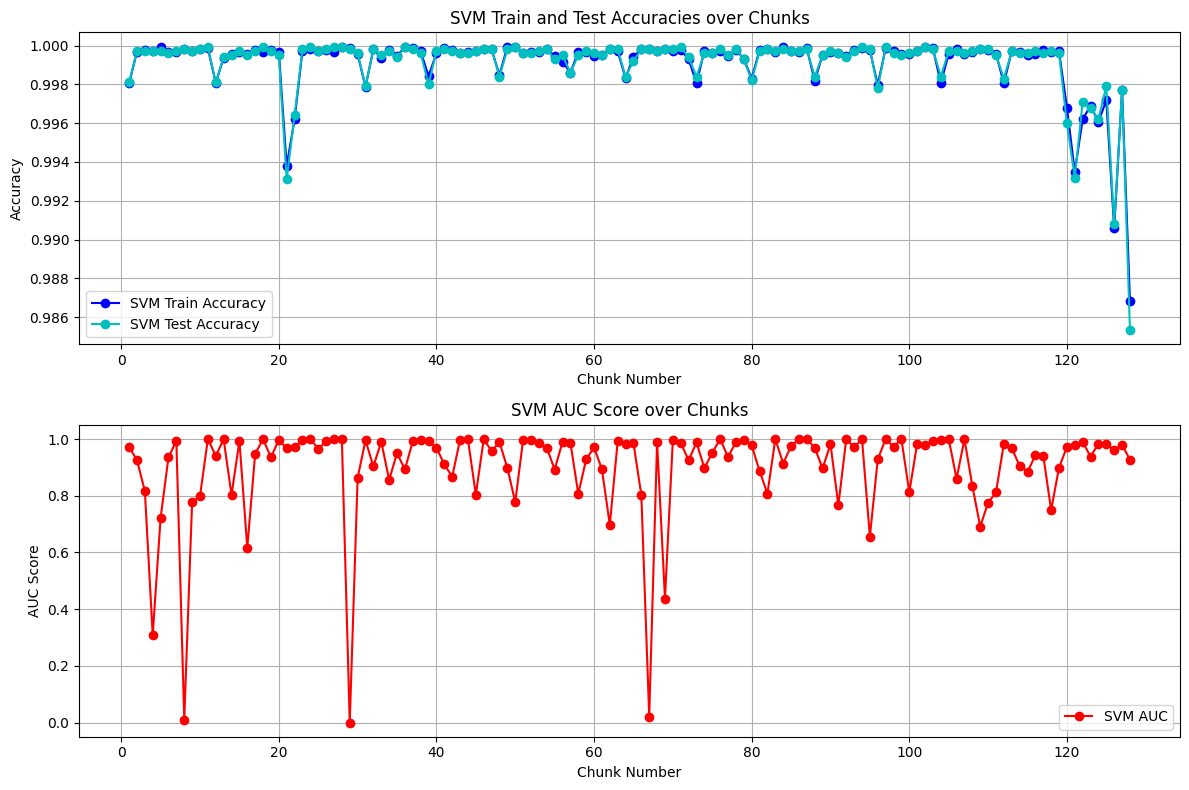

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Function to preprocess data
def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

# Function to process SVM chunks and calculate accuracies
def process_svm(file_path, chunk_size):
    svm_model = SVC(kernel='linear', random_state=42)
    scaler = StandardScaler()
    
    train_accuracies = []
    test_accuracies = []
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the SVM model
        svm_model.fit(X_train, y_train)
        
        # Evaluate the model on train set
        train_accuracy = svm_model.score(X_train, y_train)
        train_accuracies.append(train_accuracy)
        
        # Evaluate the model on test set
        test_accuracy = svm_model.score(X_test, y_test)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

# Function to process Random Forest chunks and calculate accuracies
def process_random_forest(file_path, chunk_size):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    scaler = StandardScaler()
    
    train_accuracies = []
    test_accuracies = []
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the Random Forest model
        rf_model.fit(X_train, y_train)
        
        # Evaluate the model on train set
        train_accuracy = rf_model.score(X_train, y_train)
        train_accuracies.append(train_accuracy)
        
        # Evaluate the model on test set
        test_accuracy = rf_model.score(X_test, y_test)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

# Function to process KNN chunks and calculate accuracies
def process_knn(file_path, chunk_size):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    scaler = StandardScaler()
    
    train_accuracies = []
    test_accuracies = []
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the KNN model
        knn_model.fit(X_train, y_train)
        
        # Evaluate the model on train set
        train_accuracy = knn_model.score(X_train, y_train)
        train_accuracies.append(train_accuracy)
        
        # Evaluate the model on test set
        test_accuracy = knn_model.score(X_test, y_test)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

# Function to plot accuracy graphs for all models
def plot_accuracy_graphs(svm_train_accuracies, svm_test_accuracies, rf_train_accuracies, rf_test_accuracies, knn_train_accuracies, knn_test_accuracies):
    plt.figure(figsize=(10, 6))
    
    # Plot SVM accuracies
    plt.plot(range(1, len(svm_train_accuracies) + 1), svm_train_accuracies, marker='o', linestyle='-', color='b', label='SVM Train')
    plt.plot(range(1, len(svm_test_accuracies) + 1), svm_test_accuracies, marker='o', linestyle='-', color='c', label='SVM Test')
    
    # Plot Random Forest accuracies
    plt.plot(range(1, len(rf_train_accuracies) + 1), rf_train_accuracies, marker='o', linestyle='-', color='g', label='Random Forest Train')
    plt.plot(range(1, len(rf_test_accuracies) + 1), rf_test_accuracies, marker='o', linestyle='-', color='y', label='Random Forest Test')
    
    # Plot KNN accuracies
    plt.plot(range(1, len(knn_train_accuracies) + 1), knn_train_accuracies, marker='o', linestyle='-', color='r', label='KNN Train')
    plt.plot(range(1, len(knn_test_accuracies) + 1), knn_test_accuracies, marker='o', linestyle='-', color='m', label='KNN Test')
    
    plt.title('Train and Test Accuracies of Models over Chunks')
    plt.xlabel('Chunk Number')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(svm_train_accuracies) + 1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 10000  # Adjust chunk size as needed

# Process chunks and get train and test accuracies
svm_train_accuracies, svm_test_accuracies = process_svm(file_path, chunk_size)
rf_train_accuracies, rf_test_accuracies = process_random_forest(file_path, chunk_size)
knn_train_accuracies, knn_test_accuracies = process_knn(file_path, chunk_size)

# Plot accuracy graphs
plot_accuracy_graphs(svm_train_accuracies, svm_test_accuracies, rf_train_accuracies, rf_test_accuracies, knn_train_accuracies, knn_test_accuracies)
